In [3]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Store data as DataFrame

raw_game_data = "vg_sales_updated.csv"
game_data_df = pd.read_csv(raw_game_data)
game_data_df.head()

,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,Pokémon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37


In [5]:
# Find how many games per publisher

game_qty_df = game_data_df['platform'].value_counts()

game_qty_df.head()

platform
PS2     378
PS      228
X360    222
PS3     211
Wii     163
Name: count, dtype: int64

In [6]:
# Find the overall sales
 
sum_by_platform = game_data_df.groupby('platform')[['north_america', 'europe', 'japan', 'rest_of_world', 'global']].sum()

sum_by_platform.head()

,north_america,europe,japan,rest_of_world,global
platform,,,,,
3DS,49.57,41.69,41.55,8.56,141.35
DC,5.43,1.69,1.43,0.27,8.84
DS,205.31,170.38,146.03,45.51,567.29
GB,126.25,57.86,74.68,9.33,268.12
GBA,100.55,44.46,36.97,6.19,188.09


In [7]:
# Create DataFrame with both Sales and Platform Qty

merged_df = pd.merge(game_qty_df, sum_by_platform, on="platform")

merged_df.head()

,count,north_america,europe,japan,rest_of_world,global
platform,,,,,,
PS2,378,410.41,263.31,69.11,116.53,859.32
PS,228,239.94,147.88,74.72,24.74,487.23
X360,222,358.11,161.35,6.14,54.40,580.04
PS3,211,221.42,198.93,32.27,79.73,532.26
Wii,163,323.39,214.56,56.48,61.61,655.99


In [8]:
# Caluculate Rankings

merged_df["North America Ave/Platform"] = merged_df['north_america'] / merged_df['count']
merged_df["Europe Ave/Platform"] = merged_df['europe'] / merged_df['count']
merged_df["Japan Ave/Platform"] = merged_df['japan'] / merged_df['count']
merged_df["Rest of World Ave/Platform"] = merged_df['rest_of_world'] / merged_df['count']
merged_df["Global Ave/Platform"] = merged_df['global'] / merged_df['count']

merged_df.to_csv("./platform_merged.csv")
merged_df = pd.read_csv("./platform_merged.csv")
merged_df.head()



,platform,count,north_america,europe,japan,rest_of_world,global,North America Ave/Platform,Europe Ave/Platform,Japan Ave/Platform,Rest of World Ave/Platform,Global Ave/Platform
0,PS2,378,410.41,263.31,69.11,116.53,859.32,1.085741,0.696587,0.182831,0.308280,2.273333
1,PS,228,239.94,147.88,74.72,24.74,487.23,1.052368,0.648596,0.327719,0.108509,2.136974
2,X360,222,358.11,161.35,6.14,54.40,580.04,1.613108,0.726802,0.027658,0.245045,2.612793
3,PS3,211,221.42,198.93,32.27,79.73,532.26,1.049384,0.942796,0.152938,0.377867,2.522559
4,Wii,163,323.39,214.56,56.48,61.61,655.99,1.983988,1.316319,0.346503,0.377975,4.024479


In [9]:
# North American Data

NA_data = merged_df[["platform", "North America Ave/Platform"]]
NA_data2 = NA_data.sort_values(by=['North America Ave/Platform'], ascending=False)
NA_data3 = NA_data2.reset_index()
NA_data4 = NA_data3.drop(["index"], axis=1)


print(f"The best sales per game is {NA_data4.loc[0]['platform']}")
print(f"The worst sales per game is {NA_data4['platform'].iloc[-1]}")
NA_data4.head()

best_plat_sales = pd.DataFrame({ 'Region': "North America",
                               'Platform': [NA_data4.loc[0]['platform']],
                               'Sales per Platform': NA_data4.loc[0]['North America Ave/Platform']})



The best sales per game is XOne
The worst sales per game is SAT


In [10]:
# Europe Data

Europe_data = merged_df[["platform", "Europe Ave/Platform"]]
Europe_data2 = Europe_data.sort_values(by=['Europe Ave/Platform'], ascending=False)
Europe_data3 = Europe_data2.reset_index()
Europe_data4 = Europe_data3.drop(["index"], axis=1)


print(f"The best sales per game is {Europe_data4.loc[0]['platform']}")
print(f"The worst sales per game is {Europe_data4['platform'].iloc[-1]}")
Europe_data4.head()

best_plat_sales.loc[len(best_plat_sales.index)] = ['Europe', Europe_data4.loc[0]['platform'], Europe_data4.loc[0]['Europe Ave/Platform']]

The best sales per game is PS4
The worst sales per game is SAT


In [11]:
# Rest of World Data

ROW_data = merged_df[["platform", "Rest of World Ave/Platform"]]
ROW_data2 = ROW_data.sort_values(by=['Rest of World Ave/Platform'], ascending=False)
ROW_data3 = ROW_data2.reset_index()
ROW_data4 = ROW_data3.drop(["index"], axis=1)


print(f"The best sales per game is {ROW_data4.loc[0]['platform']}")
print(f"The worst sales per game is {ROW_data4['platform'].iloc[-1]}")
ROW_data4.head()

best_plat_sales.loc[len(best_plat_sales.index)] = ['Rest of World', ROW_data4.loc[0]['platform'], ROW_data4.loc[0]['Rest of World Ave/Platform']]

The best sales per game is PS4
The worst sales per game is SAT


In [12]:
# Japan Data

Japan_data = merged_df[["platform", "Japan Ave/Platform"]]
Japan_data2 = Japan_data.sort_values(by=['Japan Ave/Platform'], ascending=False)
Japan_data3 = Japan_data2.reset_index()
Japan_data4 = Japan_data3.drop(["index"], axis=1)


print(f"The best sales per game is {Japan_data4.loc[0]['platform']}")
print(f"The worst sales per game is {Japan_data4['platform'].iloc[-1]}")
Japan_data4.head()

best_plat_sales.loc[len(best_plat_sales.index)] = ['Japan', Japan_data4.loc[0]['platform'], Japan_data4.loc[0]['Japan Ave/Platform']]

The best sales per game is 3DS
The worst sales per game is PC


In [13]:
# Global Data

Global_data = merged_df[["platform", "Global Ave/Platform"]]
Global_data2 = Global_data.sort_values(by=['Global Ave/Platform'], ascending=False)
Global_data3 = Global_data2.reset_index()
Global_data4 = Global_data3.drop(["index"], axis=1)


print(f"The best sales per game is {Global_data4.loc[0]['platform']}")
print(f"The worst sales per game is {Global_data4['platform'].iloc[-1]}")
Global_data4.head()

best_plat_sales.loc[len(best_plat_sales.index)] = ['Global', Global_data4.loc[0]['platform'], Global_data4.loc[0]['Global Ave/Platform']]

The best sales per game is PS4
The worst sales per game is PSV


          Region Platform  Sales per Platform
2  Rest of World      PS4            1.076897
3          Japan      3DS            1.598077
0  North America     XOne            3.281667
1         Europe      PS4            3.320000
4         Global      PS4            6.932069


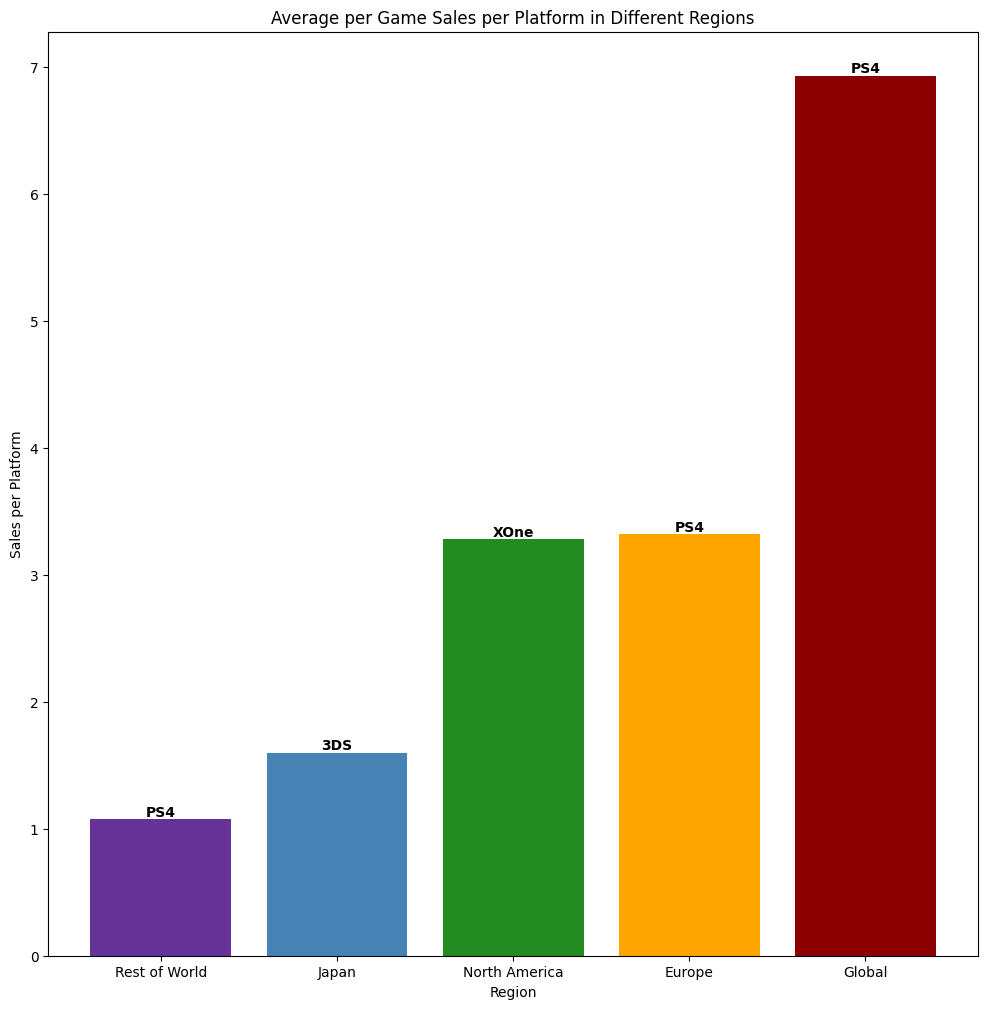

In [20]:
best_plat_sales1 = best_plat_sales.sort_values(by = 'Sales per Platform', ascending = True)
print(best_plat_sales1)



# Create the bar plot
plt.figure(figsize=(12, 12))
plt.bar(best_plat_sales1['Region'], best_plat_sales1['Sales per Platform'], color =['rebeccapurple', 'steelblue', 'forestgreen', 'orange', 'darkred'])

# Add labels to each bar
for index, row in best_plat_sales1.iterrows():
    plt.text(row['Region'], row['Sales per Platform'], row['Platform'], ha='center', va='bottom', fontweight='bold')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Sales per Platform')
plt.title('Average per Game Sales per Platform in Different Regions')

#Save the plot
plt.savefig('Platform.jpg')

# Show the plot
plt.show()
